# Analysis of the training data set

In this notebook, you'll find statistics and plots regarding the documents and the distribution of named entities in said documents in the training set.

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Read and parse the data files from the JSON format and perform some basic calculations

In [3]:
with open('../data/NER_TRAIN_JUDGEMENT.json') as f:
  tjud = json.load(f)     

with open('../data/NER_TRAIN_PREAMBLE.json') as f:
  tpre = json.load(f) 


labels = {
    # list of entities (the actual text, not the label) in the judgment doc
    'jud_entity': [res['value']['text'] for example in tjud for annotation in example['annotations'] for res in annotation['result']],

    # corresponding labels to the entities in the 'jud_entity' field
    'jud_label': [res['value']['labels'][0] for example in tjud for annotation in example['annotations'] for res in annotation['result']],

    # list of entities (the actual text, not the label) in the preamble
    'pre_entity': [res['value']['text'] for example in tpre for annotation in example['annotations'] for res in annotation['result']],

    # corresponding labels to the entities in the 'pre_entity' field
    'pre_label': [res['value']['labels'][0] for example in tpre for annotation in example['annotations'] for res in annotation['result']],
}

# each element is an integer representing the count of named entities in a sentence
ne_jud_count = []
ne_pre_count = []

# count the number of named entities per sentence in the judgment doc
for example in tjud:
  count = 0
  for annotation in example['annotations']:
    for result in annotation['result']:
      count += 1
  ne_jud_count.append(count)

#count the number of named entities per sentence in the preamble doc
for example in tpre:
  count = 0
  for annotation in example['annotations']:
    for result in annotation['result']:
      count += 1
  ne_pre_count.append(count)

sentences = {
    # a list of the plain-text sentences from the judgment
    'jud_sent': [res['data']['text'] for res in tjud],

    # corresponding count of entities per sentence in 'jud_sent'
    'ne_jud_count': ne_jud_count,

    # a list of the plain-text sentences from the preamble
    'pre_sent': [res['data']['text'] for res in tpre],

    # corresponding count of entities per sentence in 'pre_sent'
    'ne_pre_count': ne_pre_count
}

In [4]:
# list of number of entities per sentence for both jud & pre
unified = ne_jud_count + ne_pre_count

print(f"Total number of named entities:\n{np.sum(np.array(unified))} (P+J) |\
 {np.sum(np.array(ne_pre_count))} (P) |\
 {np.sum(np.array(ne_jud_count))} (J)\n")

print(f"Total number of sentences with 0 named entities:\n{unified.count(0)} (P+J) |\
 {ne_pre_count.count(0)} (P) |\
 {ne_jud_count.count(0)} (J)\n")

print(f"Median of named entities per sentence:\n{np.median(np.array(unified))} (P+J)|\
 {np.median(np.array(ne_pre_count))} (P) |\
 {np.median(np.array(ne_jud_count))} (J)\n")

print(f"Mean of named entities per sentence:\n{round(np.mean(np.array(unified)), 2)} (P+J)|\
 {round(np.mean(np.array(ne_pre_count)), 2)} (P) |\
 {round(np.mean(np.array(ne_jud_count)), 2)} (J)")

Total number of named entities:
29964 (P+J) | 12479 (P) | 17485 (J)

Total number of sentences with 0 named entities:
2179 (P+J) | 2 (P) | 2177 (J)

Median of named entities per sentence:
2.0 (P+J)| 7.0 (P) | 2.0 (J)

Mean of named entities per sentence:
2.73 (P+J)| 8.0 (P) | 1.85 (J)


41.6% of all named entities are found in preambles and 58.4 in judgments


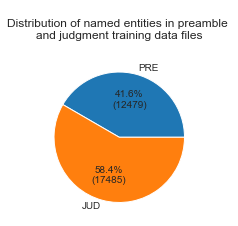

In [5]:
def autopct_format(values):
  def my_format(pct):
      total = sum(values)
      val = int(round(pct*total/100.0))
      return '{:.1f}%\n({v:d})'.format(pct, v=val)
  return my_format

data=[np.sum(np.array(ne_pre_count)), np.sum(np.array(ne_jud_count))]

plt.figure(figsize=(3, 3))
plt.title("\nDistribution of named entities in preamble \nand judgment training data files\n")
plt.pie(x=data, labels=['PRE', 'JUD'], autopct=autopct_format(data))

print("41.6% of all named entities are found in preambles and 58.4 in judgments")

C:\Users\nic-e\AppData\Local\Temp\ipykernel_66524\505711743.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1).reset_index(drop=True)


Text(0.5, 0, '\nSentence length in characters\n(largest outlier removed)')

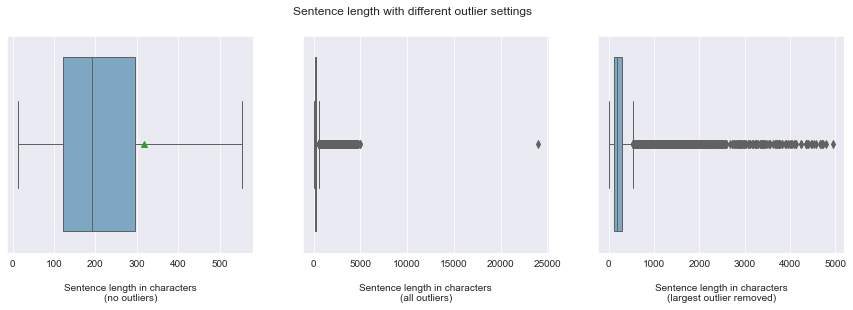

In [6]:
df = pd.DataFrame({'sentence': sentences['jud_sent'],'ne_count': sentences['ne_jud_count']})
df1 = pd.DataFrame({'sentence': sentences['pre_sent'], 'ne_count': sentences['ne_pre_count']})

df = df.append(df1).reset_index(drop=True)
df['sent_length'] = df['sentence'].apply(lambda x: len(x))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle("Sentence length with different outlier settings")
sns.boxplot(ax=ax[0], x=df['sent_length'], showfliers=False, showmeans=True, palette='PuBu', linewidth=1)
sns.boxplot(ax=ax[1], x=df['sent_length'], showfliers=True, palette='PuBu', linewidth=1)
sns.boxplot(ax=ax[2], x=df['sent_length'].iloc[:10775], showfliers=True, palette='PuBu', linewidth=1)
ax[0].set_xlabel('\nSentence length in characters\n(no outliers)', fontsize=10)
ax[1].set_xlabel('\nSentence length in characters\n(all outliers)', fontsize=10)
ax[2].set_xlabel('\nSentence length in characters\n(largest outlier removed)', fontsize=10)


Text(0.5, 0, 'Named Entities per sentence\n(with outliers)')

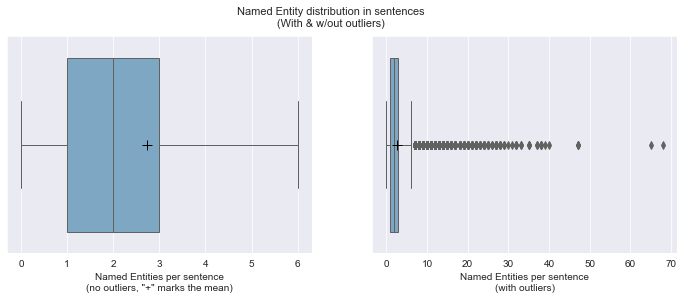

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Named Entity distribution in sentences\n(With & w/out outliers)', fontsize=11)
sns.boxplot(ax=ax[0], x=df['ne_count'], showfliers=False, palette='PuBu', linewidth=1, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
sns.boxplot(ax=ax[1], x=df['ne_count'], showfliers=True, palette='PuBu', linewidth=1, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
ax[0].set_xlabel('Named Entities per sentence\n(no outliers, "+" marks the mean)', fontsize=10)
ax[1].set_xlabel('Named Entities per sentence\n(with outliers)', fontsize=10)

In [8]:
'''
Group by judgment label and average the entity text length per label
'''

df = pd.DataFrame({'jud_text': labels['jud_entity'], 'jud_label': labels['jud_label']})
df.rename(columns={0: 'label'}, inplace=True)
df['txt_len'] = df.jud_text.apply(lambda x: len(x))
df1 = df.groupby('jud_label').mean('txt_len')
df1['txt_len_avg'] = df1['txt_len'].apply(lambda x: round(x, 2))
df1.drop(columns=['txt_len'], inplace=True)

df2 = df.groupby('jud_label').count()
df2.drop(columns='jud_text', inplace=True)

df = pd.merge(df1, df2, how='inner', left_index=True, right_index=True).reset_index()
df.rename(columns={'txt_len': 'count'}, inplace=True)
df = df.sort_values('txt_len_avg', ascending=False).reset_index(drop=True)
df

,jud_label,txt_len_avg,count
0,PRECEDENT,53.37,1351
1,CASE_NUMBER,24.11,1040
2,ORG,19.19,1441
3,COURT,18.80,1293
4,STATUTE,17.39,1804
5,RESPONDENT,15.41,324
6,PROVISION,13.67,2384
7,WITNESS,11.94,881
8,DATE,11.66,1885
9,PETITIONER,11.59,464


C:\Users\nic-e\AppData\Local\Temp\ipykernel_66524\3767659928.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')


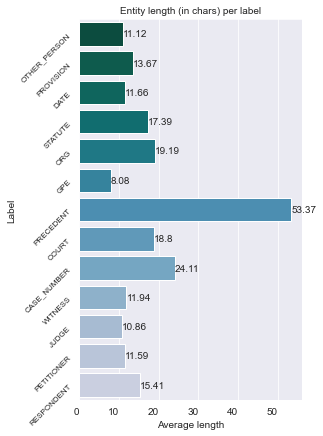

<Figure size 432x288 with 0 Axes>

In [11]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4, 7))
sns.barplot(y=df.jud_label, x=df.txt_len_avg, palette=sns.color_palette("PuBuGn_r", n_colors=len(df) + 4), ax=ax, orientation='horizontal')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
ax.bar_label(ax.containers[0])
plt.title('Entity length (in chars) per label', fontsize=10)
plt.ylabel('Label')
plt.xlabel('Average length')
plt.show()
plt.savefig('../../plots/judgment_labels.jpg', dpi=700)

C:\Users\nic-e\AppData\Local\Temp\ipykernel_66524\846657601.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')


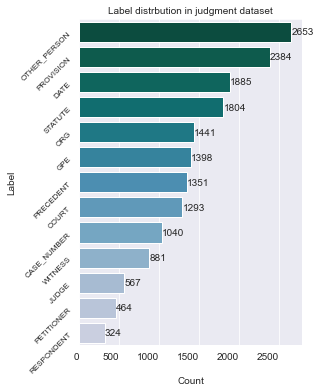

<Figure size 432x288 with 0 Axes>

In [10]:
import seaborn as sns

df = df.sort_values('count', ascending=False)

fig, ax = plt.subplots(figsize=(4, 6))
sns.barplot(y=df.jud_label, x=df['count'], palette=sns.color_palette("PuBuGn_r", n_colors=len(df) + 4), ax=ax, orientation='horizontal')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
ax.bar_label(ax.containers[0])
plt.title('Label distrbution in judgment dataset', fontsize=10)
plt.ylabel('Label')
plt.xlabel('\nCount')
plt.show()
plt.savefig('../../plots/judgment_labels.jpg', dpi=700)

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(labels['pre_label'])
df.rename(columns={0: 'label'}, inplace=True)
df['cnt'] = 1
df = df.groupby('label').count()

df = df.sort_values('cnt', ascending=False)
df.rename(columns={'cnt': 'count'}, inplace=True)
df

,count
label,
RESPONDENT,3538
LAWYER,3505
PETITIONER,2604
JUDGE,1758
COURT,1074


AttributeError: 'bool' object has no attribute 'all'

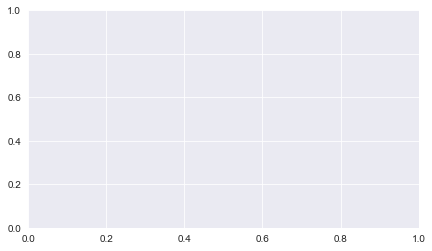

In [25]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(x=df.index, y=df.count, palette=sns.color_palette("PuBu_r", n_colors=len(df) + 4), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.bar_label(ax.containers[0])
plt.title('Label distrbution in preamble training data set', fontsize=6)
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()
plt.savefig('../../plots/preamble_labels.png', dpi=700)

In [26]:
df = pd.DataFrame(labels['jud_label'])
df = df.append(pd.DataFrame(labels['pre_label']))
df.rename(columns={0: 'label'}, inplace=True)
df['cnt'] = 1
df = df.groupby('label').count()
df = df.sort_values('cnt', ascending=False)
df


C:\Users\nic-e\AppData\Local\Temp\ipykernel_66524\2747792113.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(labels['pre_label']))


,cnt
label,
RESPONDENT,3862
LAWYER,3505
PETITIONER,3068
OTHER_PERSON,2653
PROVISION,2384
COURT,2367
JUDGE,2325
DATE,1885
STATUTE,1804


In [ ]:

fig, ax = plt.subplots(figsize=(6, 12))
sns.barplot(y=df.index, x=df.cnt, palette=sns.color_palette("PuBu_r", n_colors=len(df) + 4), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
ax.bar_label(ax.containers[0])
plt.title('Label distrbution (JUD+PRE)')
plt.ylabel('Label')
plt.xlabel('Count')
plt.show()
# plt.savefig('all_labels.png', dpi=700)